**The MNIST datase**t is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

Step 1: Load Dataset

Step 2: Make Dataset Iterable

Step 3: Create Model Class

Step 4: Instantiate Model Class

Step 5: Instantiate Loss Class

Step 6: Instantiate Optimizer Class

Step 7: Train Model

Step 8: Test Results 

**Step 1: Loading MNIST Train Dataset**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [ ]:
train_dataset=dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


checking length of train/test datasets

In [ ]:
print("length of train dataset",len(train_dataset))#To find length of training dataset
print("\nlabels of train dataset",train_dataset.train_labels)#to find all train lables
print("length of train labels", len(train_dataset.train_labels))#to find length of train labels
print("distribution of train dataset lables",train_dataset.train_labels.bincount())#to find number of times each train label has occured.


print("\n\n\nlength of test dataset",len(test_dataset))
print("\nlabels of test dataset",test_dataset.train_labels)
print("length of test labels",len(test_dataset.test_labels))
print("distribution of test dataset lables",test_dataset.test_labels.bincount())

length of train dataset 60000

labels of train dataset tensor([5, 0, 4,  ..., 5, 6, 8])
length of train labels 60000
distribution of train dataset lables tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])



length of test dataset 10000

labels of test dataset tensor([7, 2, 1,  ..., 4, 5, 6])
length of test labels 10000
distribution of test dataset lables tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


visualising few images

2
torch.Size([1, 28, 28])
5


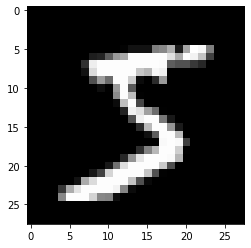

In [ ]:
sample1=next(iter(train_dataset))
print(len(sample1))
image,label=sample1

print(image.shape)
print(label)

import matplotlib.pyplot as plt
plt.imshow(image.squeeze(),cmap='gray')


**Step 2: Make Dataset Iterable**

In [ ]:
no_of_epoch = 2
batch_size = 100

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,shuffle=True,batch_size=batch_size)#dataloader of train dataset
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)#dataloader of test dataset

In [ ]:
sample1_ldr=next(iter(train_loader))
print("\ntype of 1st batch is ",type(sample1_ldr))
print("\nlength of 1st batch is ",len(sample1_ldr))#this is one batch of size 100

images,labels=sample1_ldr#this is because length is 2

#print(images[0]),this will print 28 x 28 matrix
print("\nsize of images in each batch\n",images.shape,type(images))
print("\nsize of labels in each batch\n",labels.shape,type(labels))

print("\n\nlabels of images in 1st batch :",labels)




type of 1st batch is  <class 'list'>

length of 1st batch is  2

size of images in each batch
 torch.Size([100, 1, 28, 28]) <class 'torch.Tensor'>

size of labels in each batch
 torch.Size([100]) <class 'torch.Tensor'>


labels of images in 1st batch : tensor([5, 4, 4, 3, 9, 0, 8, 2, 5, 3, 7, 9, 8, 5, 2, 6, 7, 4, 0, 3, 7, 7, 0, 4,
        7, 6, 0, 9, 5, 3, 7, 2, 0, 1, 4, 3, 8, 1, 0, 2, 3, 3, 8, 2, 2, 3, 9, 0,
        5, 9, 6, 5, 2, 0, 5, 9, 5, 9, 8, 2, 6, 8, 5, 6, 1, 0, 0, 6, 1, 4, 3, 0,
        1, 1, 8, 0, 3, 0, 5, 1, 6, 5, 3, 7, 5, 4, 7, 6, 0, 5, 5, 6, 4, 0, 8, 3,
        7, 5, 2, 9])


**Step 3: Create Model Class**

In [ ]:
class feedforwardneuralnetwork(nn.Module):

    def __init__(self,input_dim,hidden_dim,output_dim):
            super(feedforwardneuralnetwork, self).__init__()
            self.input_layer=nn.Linear(input_dim,hidden_dim)
            self.relu_ip_layer=nn.ReLU()
            self.first_hidden_layer=nn.Linear(hidden_dim,output_dim)

    def forward(self,x):
        out=self.input_layer(x)
        out=self.relu_ip_layer(out)
        out=self.first_hidden_layer(out)  
        return out

**Step 4: Instantiate Model Class**

In [ ]:
"""Our input size is determined by the size of the image (numbers ranging from 0 to 9) 
which has a width of 28 pixels and a height of 28 pixels. Hence the size of our input is 784 (28 x 28).

Our output size is what we are trying to predict. When we pass an image to our model, 
it will try to predict if it's 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. That is a total of 10 classes, hence we have an output size of 10.

Hidden dimension: 100

Similar term
Number of neurons
Number of non-linear activation functions

"""

input_dim=28*28
hidden_dim=100
output_dim=10

model=feedforwardneuralnetwork(input_dim,hidden_dim,output_dim)

In [ ]:
print(model)
print(model.__dict__)

feedforwardneuralnetwork(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (relu_ip_layer): ReLU()
  (first_hidden_layer): Linear(in_features=100, out_features=10, bias=True)
)
{'training': True, '_parameters': OrderedDict(), '_buffers': OrderedDict(), '_non_persistent_buffers_set': set(), '_backward_hooks': OrderedDict(), '_is_full_backward_hook': None, '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict([('input_layer', Linear(in_features=784, out_features=100, bias=True)), ('relu_ip_layer', ReLU()), ('first_hidden_layer', Linear(in_features=100, out_features=10, bias=True))])}


**Step 5: Instantiate Loss Class**

In [ ]:
criterion=nn.CrossEntropyLoss()

**Step 6: Instantiate Optimizer Class**


In [ ]:
learning_rate=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)#how to modify weights after calculating gradient descent


**Step 7: Train Model**

iterating through all 600 batches 

In [ ]:
   
 #mnist dataset is 60000, batch_size is 100 so total number of batches will be (60000/100)=600
 #i value will be from 0 to 599, with each one representing each batch loaded in dataloader. 
for i, data in enumerate(train_loader):
  images,labels=data
  print(i, images.shape, labels.shape)
  

    
   

0 torch.Size([100, 1, 28, 28]) torch.Size([100])
1 torch.Size([100, 1, 28, 28]) torch.Size([100])
2 torch.Size([100, 1, 28, 28]) torch.Size([100])
3 torch.Size([100, 1, 28, 28]) torch.Size([100])
4 torch.Size([100, 1, 28, 28]) torch.Size([100])
5 torch.Size([100, 1, 28, 28]) torch.Size([100])
6 torch.Size([100, 1, 28, 28]) torch.Size([100])
7 torch.Size([100, 1, 28, 28]) torch.Size([100])
8 torch.Size([100, 1, 28, 28]) torch.Size([100])
9 torch.Size([100, 1, 28, 28]) torch.Size([100])
10 torch.Size([100, 1, 28, 28]) torch.Size([100])
11 torch.Size([100, 1, 28, 28]) torch.Size([100])
12 torch.Size([100, 1, 28, 28]) torch.Size([100])
13 torch.Size([100, 1, 28, 28]) torch.Size([100])
14 torch.Size([100, 1, 28, 28]) torch.Size([100])
15 torch.Size([100, 1, 28, 28]) torch.Size([100])
16 torch.Size([100, 1, 28, 28]) torch.Size([100])
17 torch.Size([100, 1, 28, 28]) torch.Size([100])
18 torch.Size([100, 1, 28, 28]) torch.Size([100])
19 torch.Size([100, 1, 28, 28]) torch.Size([100])
20 torch.S

checking in detail for 1st batch

In [ ]:
#checking in detail for 1st batch
for i, data in enumerate(train_loader):
  images,labels=data # for every batch, it comprises of (images, labels) 
                     # batch size is 100,so 100 images,   each image will be 28 x 28 and corresponding label for 100 images
                     #will have 100 size  
  
  print(i, images.shape, labels.shape)
  print(images[1].shape)
  print(images[1])#28 x 28
  break

0 torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

below shows different sizes and thier transformation, which is needed for training, below is shown for one batch

In [ ]:
#each image in batch is of 2D (28 X 28) , transdorm this to 1D.
#checking this for one batch/one image
print("no of batches or len(train_loader) {}\n".format(len(train_loader)))


for epoch_num in range(no_of_epoch):
    for batch_number , data in enumerate (train_loader):
        print("batch number {}".format(batch_number+1))
     
        print("type of data ",type(data))
        print("len of data",len(data))
        images, labels=data
        print("\nimages.shape -->{}".format(images.shape))
        print("labels.shape -->{}".format(labels.shape))
        print("\nchanging size of each image from 2D array, 28 x 28 to 1D array , 784")
        images=images.reshape(-1,28*28)
        print("images.shape -->{}".format(images.shape))
        print("labels.shape -->{}".format(labels.shape))

        break
    break   

no of batches or len(train_loader) 600

batch number 1
type of data  <class 'list'>
len of data 2

images.shape -->torch.Size([100, 1, 28, 28])
labels.shape -->torch.Size([100])

changing size of each image from 2D array, 28 x 28 to 1D array , 784
images.shape -->torch.Size([100, 784])
labels.shape -->torch.Size([100])


below is training on one batch only.

In [ ]:
#training loop on 1 batch
for epoch in range(no_of_epoch):
  for batch_number, data in enumerate(train_loader):
   images,labels=data
   
   images=images.reshape(-1,28*28)
   
   outputs=model(images)  #model=feedforwardneuralnetwork(input_dim,hidden_dim,output_dim) , pass one batch of images to this.calls forward function
   
   
   loss=criterion(outputs,labels)#calculate the loss
  
   optimizer.zero_grad()#nullify the gradient

   loss.backward()#calculate new gradient.
   
   optimizer.step()#update weights

   print("epoch no : {}  batch number : {} , loss : {} ".format(epoch+1,batch_number+1,loss))
   break
  break   

print(type(outputs))
print(outputs.shape)
print(outputs)





epoch no : 1  batch number : 1 , loss : 2.301827907562256 
<class 'torch.Tensor'>
torch.Size([100, 10])
tensor([[ 1.0366e-02, -2.4723e-01, -9.2105e-02, -7.9058e-02,  4.8429e-02,
         -1.7359e-01,  1.6761e-02,  7.6269e-03, -3.9942e-02,  7.0261e-02],
        [ 3.7190e-02, -1.3177e-01, -9.2623e-02, -3.3026e-02,  1.2146e-01,
         -4.0592e-02,  4.7902e-02,  1.2178e-01,  7.9475e-03, -1.6953e-02],
        [ 3.8050e-02, -1.6395e-01, -1.1928e-01,  2.6705e-02,  1.2077e-01,
         -6.6833e-02,  2.4003e-03,  1.1084e-01, -1.5314e-02,  3.5304e-02],
        [ 1.1845e-02, -2.0262e-01, -8.1996e-02, -1.5088e-01, -7.3477e-02,
         -1.0509e-01,  2.4636e-02,  1.5079e-01, -4.2258e-02, -1.2666e-02],
        [-9.3708e-02, -1.4641e-01,  9.4517e-03,  1.5662e-02, -1.4174e-02,
          3.7341e-02,  1.0210e-01,  1.4481e-01,  3.1738e-02,  1.0314e-02],
        [-7.3049e-02, -1.5969e-01, -1.3247e-01, -7.0788e-02, -7.2301e-02,
         -4.3288e-02,  1.2656e-01,  1.6411e-01,  2.9284e-02,  2.3146e-02],
  

how to check all weights and bias set

In [ ]:
#to see all weights and bias set 
for name, param in model.named_parameters():
  print(name)
  print(param.shape)
  print("\n")

input_layer.weight
torch.Size([100, 784])


input_layer.bias
torch.Size([100])


first_hidden_layer.weight
torch.Size([10, 100])


first_hidden_layer.bias
torch.Size([10])




complete training loop over two batches

In [ ]:
#training loop
for epoch in range(no_of_epoch):
  for batch_number, data in enumerate(train_loader):
   images,labels=data
   
   images=images.reshape(-1,28*28)
   
   outputs=model(images)  #model=feedforwardneuralnetwork(input_dim,hidden_dim,output_dim) , pass one batch of images to this.calls forward function
   
   loss=criterion(outputs,labels)#calculate the loss
  
   optimizer.zero_grad()#nullify the gradient

   loss.backward()#calculate new gradient.
   
   optimizer.step()#update weights
    
   if (batch_number+1) % 30 == 0 :
     print("epoch no : {}  batch number : {} , loss : {} ".format(epoch+1,batch_number+1,loss))



epoch no : 1  batch number : 30 , loss : 0.4718098044395447 
epoch no : 1  batch number : 60 , loss : 0.2517489492893219 
epoch no : 1  batch number : 90 , loss : 0.3210567831993103 
epoch no : 1  batch number : 120 , loss : 0.33960434794425964 
epoch no : 1  batch number : 150 , loss : 0.2315005511045456 
epoch no : 1  batch number : 180 , loss : 0.3183180093765259 
epoch no : 1  batch number : 210 , loss : 0.21655014157295227 
epoch no : 1  batch number : 240 , loss : 0.15985380113124847 
epoch no : 1  batch number : 270 , loss : 0.1722225397825241 
epoch no : 1  batch number : 300 , loss : 0.1350795477628708 
epoch no : 1  batch number : 330 , loss : 0.1737954318523407 
epoch no : 1  batch number : 360 , loss : 0.21032504737377167 
epoch no : 1  batch number : 390 , loss : 0.18893377482891083 
epoch no : 1  batch number : 420 , loss : 0.05289771407842636 
epoch no : 1  batch number : 450 , loss : 0.24723222851753235 
epoch no : 1  batch number : 480 , loss : 0.15712183713912964 
epo

**testing on test_loader to check accuracy**


testing results on one batch only

In [ ]:
#testing results on 1 batch
with torch.no_grad():
 for (t_images,t_labels) in test_loader:
  t_images=t_images.reshape(-1,28*28)
  t_output=model(t_images)
  print(t_output.shape)#the shape will be (100,10) , 100 is size of batch and 10 is because , it will give 10 probabiliies corresponding to 10 classes
                       #softmax is applied over here
  #value,index
  value,prediction=torch.max(t_output,1)
  #value determines the max value after softmax is applied for index=prediction for that image
  print("\n",value)
  print("\n",prediction)
  break
  


torch.Size([100, 10])

 tensor([16.8638, 14.5580,  6.9344,  8.6764,  9.9396,  9.4897, 11.9343,  7.4335,
        11.9374, 11.2796,  8.1383,  9.2628,  9.9928,  9.3527, 14.2392,  6.3485,
         9.3277, 17.2045,  2.3826, 14.8551, 10.2023,  8.9243, 13.0141, 16.5285,
         9.8389, 12.4637, 11.5195, 12.8212, 11.3954, 11.8606, 13.1987,  7.6758,
        11.4475,  7.3292, 17.5906,  7.6604, 14.5058, 11.9562,  7.0078, 13.7272,
         9.2424, 10.9750, 15.1303,  6.7298,  6.6327,  8.8256,  8.8995, 11.2183,
        16.5520, 15.2277,  9.3003,  7.0448, 14.0822,  9.1739, 14.2101, 10.8187,
        15.7752,  7.8671, 10.1344,  9.8857, 15.1393,  6.1454,  6.7471,  3.9509,
        15.1360,  7.2869,  4.7454, 12.9046, 11.8866, 11.8366, 16.7759, 12.5732,
        12.2741, 10.0281, 13.6850, 13.2425, 11.4275,  8.7076,  9.6878, 14.6064,
        10.8135,  8.3059, 17.2225, 13.9933,  8.9655, 17.2171, 13.5353,  8.3043,
        16.6286,  8.5574,  9.3919, 12.5541,  6.6079,  9.2485, 12.6199,  9.1388,
         4.8069,

In [ ]:
print(type(t_output))
print(t_output.shape)
print(t_output)

<class 'torch.Tensor'>
torch.Size([100, 10])
tensor([[-1.1908e+01, -5.2698e+00,  3.1597e+00,  4.1181e-01, -1.4119e+01,
         -5.6730e+00, -1.3665e+01,  1.6864e+01, -7.8857e+00, -8.4578e+00],
        [-5.0882e+00,  2.7440e+00,  1.4558e+01, -2.2612e+00, -1.5913e+01,
         -5.2076e+00, -3.3923e+00, -1.4400e+01,  3.8842e-01, -1.6379e+01],
        [-1.2015e+01,  6.9344e+00, -4.5045e+00, -5.5468e+00, -3.9026e+00,
         -5.9553e+00, -5.9436e+00, -5.6016e-01, -1.6570e+00, -5.8527e+00],
        [ 8.6764e+00, -1.2074e+01,  2.0106e+00, -1.6476e+01,  1.5050e-01,
          1.0967e+00, -2.3168e+00,  1.7840e+00, -8.1673e+00, -2.7353e+00],
        [-3.6527e+00, -1.1255e+01, -5.5169e+00, -8.6244e+00,  9.9396e+00,
         -1.5766e+00, -1.6473e+00,  4.6863e-01, -7.1706e+00,  1.4533e+00],
        [-1.6478e+01,  9.4897e+00, -7.8411e+00, -6.9655e+00, -1.9754e+00,
         -1.2585e+01, -1.1139e+01,  1.1774e+00, -2.5107e+00, -5.5026e+00],
        [-1.1056e+01, -6.9112e+00, -9.5947e+00, -5.4792e+00, 

testing the model on all test batches 
and calculating for accuracy after testing on all

In [ ]:
#calculating for accuracy after testing on all

"""
torch.Size([100, 10]) is shape of t_output, which says it has 100 samples as batch size is 100 and 10 different prectictions as we 
are classifying digits and hence finding predictions corresponding to 10 classes
"""
n_correct=0
n_samples=0
with torch.no_grad():
 for (t_images,t_labels) in test_loader:
  t_images=t_images.reshape(-1,28*28)
  t_output=model(t_images)
 
  #value,index
  value,predictions=torch.max(t_output,1)
  n_samples += t_labels.shape[0]
  n_correct +=(predictions == t_labels).sum().item()

accuracy= (n_correct/n_samples)*100

print("\n\n final accuracy is {:.4f}".format(accuracy))
  




 final accuracy is 96.3400
